### GRIP : The Spark Foundation - INTERNSHIP November-2021

##### Data Science and Business Analytics Intern

##### Author : Abhishek Chakraborty

##### TASK 2 : Exploratory Data Analysis- RETAIL -SuperStore

In this task, being as a business manager we have to find out the weak areas where we can work on 
to make better profit in Retail-SuperStore

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/Users/draculalemon/Downloads/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.Quantity.value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [6]:
#checking the shape
df.shape

(9994, 13)

In [7]:
#checking for missing value
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#Statistical details of the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


 Gross profit margin can turn negative when the costs of production exceed total sales. A negative margin can be an indication of a company's inability to control costs.

In [9]:
df[['Profit']].describe()

,Profit
count,9994.000000
mean,28.656896
std,234.260108
min,-6599.978000
25%,1.728750
50%,8.666500
75%,29.364000
max,8399.976000


In [10]:
#checking for duplicates values
df.duplicated().sum()

17

In [11]:
df.drop_duplicates() #dropping all duplicates value

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [12]:
df.Discount.value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

In [13]:
#checking for unique value in each columns
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# EDA of SuperStore

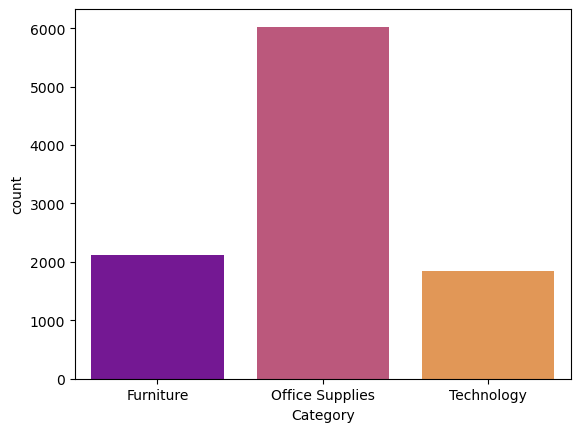

In [14]:
# counting the items in different category
sns.countplot(df.Category, palette=("plasma"))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

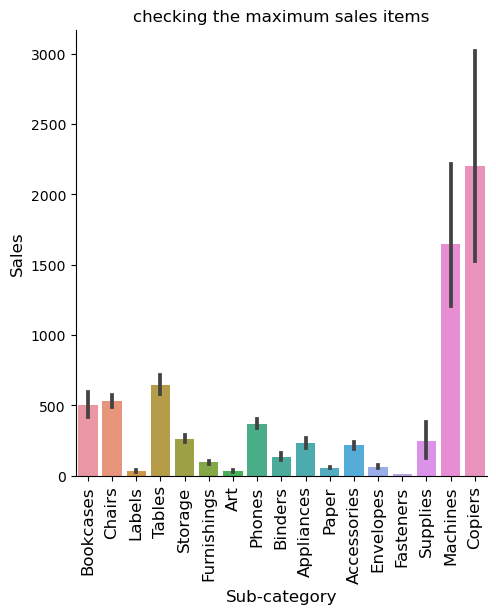

In [67]:
# checking the maximum sales in sales Sub-Category
sns.catplot(x=df['Sub-Category'],y=df['Sales'],data=df.sort_values('Sub-Category',ascending=False),kind='bar')
plt.title('checking the maximum sales items',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.xlabel('Sub-category',fontsize=12)
plt.xticks(rotation ='vertical',fontsize=12)

inferance:
As from the above graph we can see that the maximum sales item in the superstore is Copiers and then Machines followed by tables in Sub-Category

Text(0.5, 9.444444444444438, 'Segment')

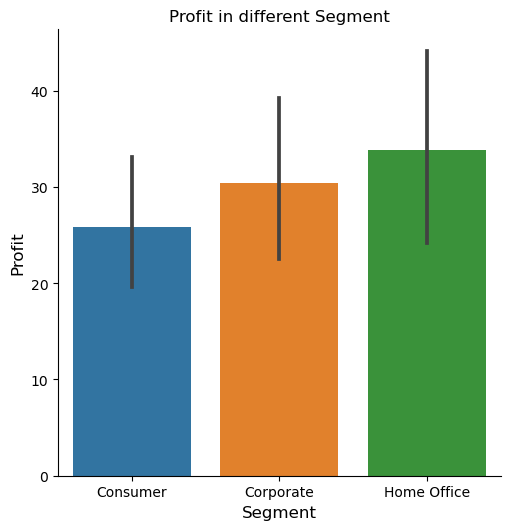

In [74]:
# checking the maximum sales items
sns.catplot(x=df['Segment'],y=df['Profit'],data=df.sort_values('Segment',ascending=False),kind='bar')
plt.title('Profit in different Segment',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.xlabel('Segment',fontsize=12)

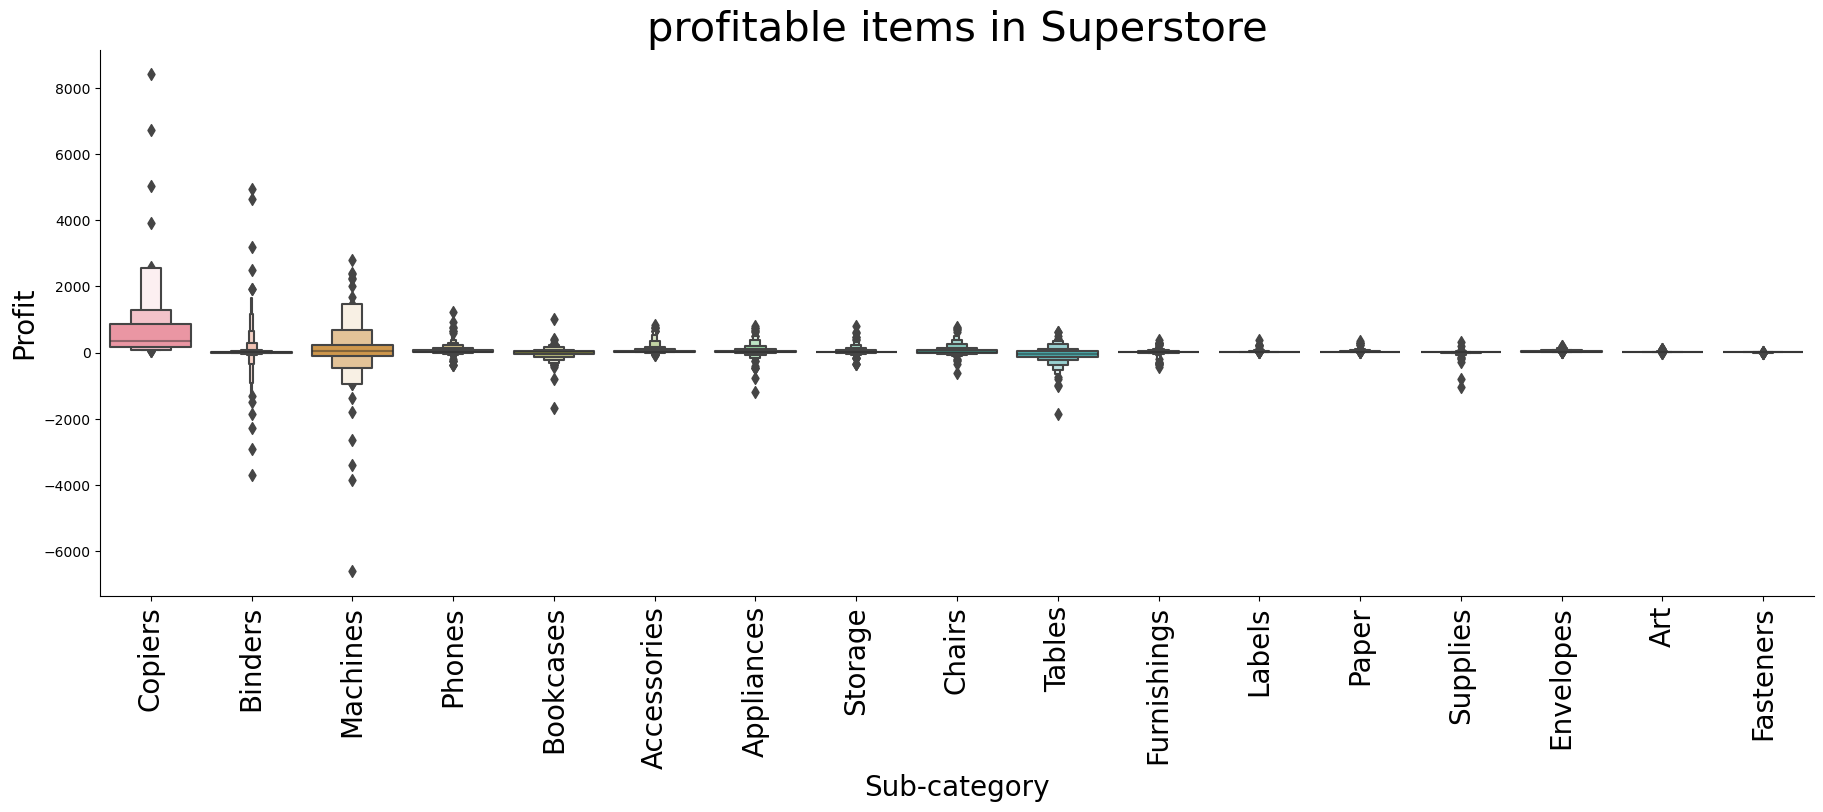

In [33]:
#checking which category is more profitable at what price range in the superstore
sns.catplot(y="Profit",x="Sub-Category",data=df.sort_values('Profit',ascending=False),kind="boxen",height=6,aspect=3)
plt.title('profitable items in Superstore',fontsize=30)
plt.ylabel('Profit',fontsize=20)
plt.xlabel('Sub-category',fontsize=20)
plt.xticks(rotation ='vertical',fontsize=20)
plt.show()

As we can see that in the above catplot graph max profit is comming from the copiers only as its sales is higher that rest of the items.

In [146]:
#checking in which region superstore is having max profit and min profit
region_grp=df.groupby(['Region']) # grouping the Region column with different column

In [147]:
region_grp['Category','Profit','Sales','Discount'].max()

,Category,Profit,Sales,Discount
Region,,,,
Central,Technology,8399.9760,17499.950,0.8
East,Technology,5039.9856,11199.968,0.7
South,Technology,3177.4750,22638.480,0.7
West,Technology,6719.9808,13999.960,0.7


Here we can see that Category ( Technology ) is having max profit and also the highest profit generating region

In [148]:
region_grp['Category','Profit','Sales','Discount'].min()

,Category,Profit,Sales,Discount
Region,,,,
Central,Furniture,-3701.8928,0.444,0.0
East,Furniture,-6599.9780,0.852,0.0
South,Furniture,-3839.9904,1.167,0.0
West,Furniture,-3399.9800,0.990,0.0


Here we can see that Category ( Furniture ) is having lowest or negative profit and also the Lowest profit generating region

#### CONCLUSION

As we can see in the above table that when the discount is high we can see more profit in the Technology Category and with increase in sales too,
But when there is less or no discount we can see that the profit of furniture Category  moves towards negative numbers.
Which is impacting the overall Profit of the SuperStore.

solution:
we can give discount in the furniture Categories while keeping in mind cost of the production.